<a href="https://colab.research.google.com/github/ehgeraldo/primeiro_projeto_machine_learn/blob/master/1%C2%B0_projeto_machine_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1°_projeto_machine_learning!

**Métodos de estudos cíclicos:**

# Tópicos utilizados:
**Python -> Machine learning -> Métricas de performance -> Estatística.**

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
upload = files.upload()

Saving projeto_machine_learning.jpg to projeto_machine_learning.jpg


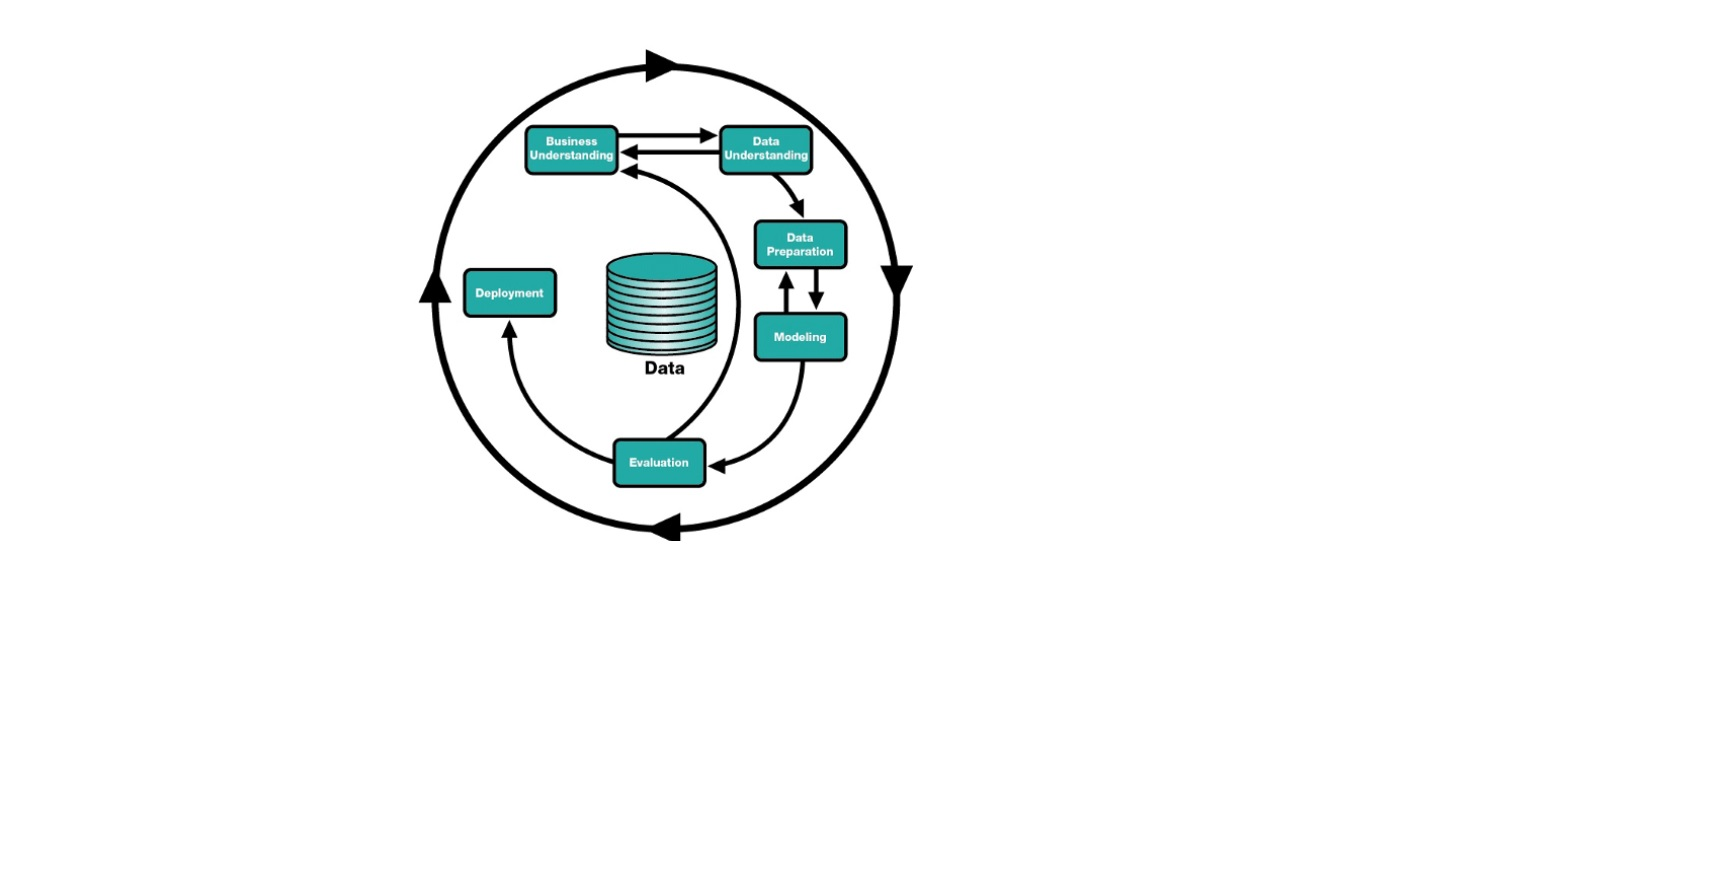

In [ ]:
Image('projeto_machine_learning.jpg', width = 2500)

#Imports:

In [ ]:
import pandas as pd

from sklearn import linear_model as lm

import numpy as np



#Loading data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_raw = pd.read_csv ( '/content/drive/My Drive/kc_house_data.csv' )

In [ ]:
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# NaN counting:

df_raw.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# All NaN's are removing:

df_raw.drop('sqft_above', axis=1, inplace=True)

In [ ]:
# df_raw without sqft_above column:

df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data preparation:

In [ ]:
#features:

x_train = df_raw.drop ( ['date', 'price'], axis=1 )

#response variable:

y_train = df_raw ['price'].copy()

In [ ]:
x_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
y_train

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

# Model Training:

In [ ]:
# model description:

model_lr = lm.LinearRegression()

# model training:

model_lr.fit( x_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prediction:

pred = model_lr.predict( x_train )

# Performance Metrics:




In [ ]:
df1 = df_raw.copy()

In [ ]:
df1['prediction'] = pred

In [ ]:
df1[['id', 'price', 'prediction']].head()

,id,price,prediction
0,7129300520,221900.0,205766.264610
1,6414100192,538000.0,731219.649830
2,5631500400,180000.0,379097.882654
3,2487200875,604000.0,457424.134325
4,1954400510,510000.0,444789.054718


In [ ]:
df1['error'] = df1['price'] - df1['prediction']

In [ ]:
df1[['id', 'price', 'prediction', 'error']].head()

,id,price,prediction,error
0,7129300520,221900.0,205766.264610,16133.735390
1,6414100192,538000.0,731219.649830,-193219.649830
2,5631500400,180000.0,379097.882654,-199097.882654
3,2487200875,604000.0,457424.134325,146575.865675
4,1954400510,510000.0,444789.054718,65210.945282


In [ ]:
df1['error_abs'] = np.abs( df1['error'] )

In [ ]:
df1[[ 'id','price', 'prediction', 'error', 'error_abs' ]].head()

,id,price,prediction,error,error_abs
0,7129300520,221900.0,205766.264610,16133.735390,16133.735390
1,6414100192,538000.0,731219.649830,-193219.649830,193219.649830
2,5631500400,180000.0,379097.882654,-199097.882654,199097.882654
3,2487200875,604000.0,457424.134325,146575.865675,146575.865675
4,1954400510,510000.0,444789.054718,65210.945282,65210.945282


In [ ]:
np.sum( df1['error_abs'] )

2721542334.664752

In [ ]:
np.sum( df1['error_abs'] )/ len (df1['error_abs'] )

125921.54419399213

In [ ]:
np.mean( df1['error_abs'])

125921.54419399226

In [ ]:
df1['error_%'] = (( df1['price'] - df1['prediction'] ) / df1['price'] )

In [ ]:
df1[[ 'id','price', 'prediction', 'error', 'error_abs', 'error_%' ]].head()

,id,price,prediction,error,error_abs,error_%
0,7129300520,221900.0,205766.264610,16133.735390,16133.735390,0.072707
1,6414100192,538000.0,731219.649830,-193219.649830,193219.649830,-0.359144
2,5631500400,180000.0,379097.882654,-199097.882654,199097.882654,-1.106099
3,2487200875,604000.0,457424.134325,146575.865675,146575.865675,0.242675
4,1954400510,510000.0,444789.054718,65210.945282,65210.945282,0.127865


In [ ]:
df1['error_%_abs'] = np.abs( df1['error_%'] )

In [ ]:
df1[[ 'id','price', 'prediction', 'error', 'error_abs', 'error_%', 'error_%_abs' ]].head()

,id,price,prediction,error,error_abs,error_%,error_%_abs
0,7129300520,221900.0,205766.264610,16133.735390,16133.735390,0.072707,0.072707
1,6414100192,538000.0,731219.649830,-193219.649830,193219.649830,-0.359144,0.359144
2,5631500400,180000.0,379097.882654,-199097.882654,199097.882654,-1.106099,1.106099
3,2487200875,604000.0,457424.134325,146575.865675,146575.865675,0.242675,0.242675
4,1954400510,510000.0,444789.054718,65210.945282,65210.945282,0.127865,0.127865


In [ ]:
# mean absolute error:
mae = np.mean( df1['error_abs'] )

print ( 'MAE: {}'.format ( mae ) )

MAE: 125921.54419399226


In [ ]:
# mean absolute percentage error:

mape = np.mean( df1['error_%_abs'] )

print( 'MAPE: {}'.format ( mape ) )

MAPE: 0.25580512536187877
